# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab as pl
import seaborn as sns
import math
import statsmodels.api as sm
sns.set()


df = pd.read_csv('human_body_temperature.csv')

C:\Users\TimusLetap\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Inspect Data for any obvious observations

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [4]:
df['gender'].describe()

count     130
unique      2
top         F
freq       65
Name: gender, dtype: object

In [5]:
# Inspect duplicate observations:
df[df.duplicated(keep=False)]

,temperature,gender,heart_rate
7,98.8,M,78.0
54,98.2,F,73.0
72,98.0,M,78.0
75,98.8,M,78.0
87,98.0,M,78.0
127,98.2,F,73.0


## Is the sample size large? Are the observations independent?
* Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    * The mean of the observed body temperature would provide for a normal curve as we can see in te distribution plot allowing us to ascertain that the observations are indeed independent 
    * Sample size is 130 with 65 per each gender

The sample size, 130, for the body temperature dataset is greater than 30 which is considered large.The observations are independent, as they are not influenced by and reveal no information about any other observation. Each value for temperature represents a distinct measure of such.

In [25]:
# Print the body temperature sample size:
print('Sample Size:', n)

Sample Size: 130


In [6]:
temperature = df['temperature']

In [7]:
# Verify sample populaiton mean

population_temperature_mean= temperature.mean()
print (population_temperature_mean)

population_temperature_mean - 98.6

98.24923076923078


-0.35076923076921673

*  We can see that the difference of means between our random sample and original sample is approx 0.06 which is not significant enough to not consider our sample as inaccurate in terms of representing the population

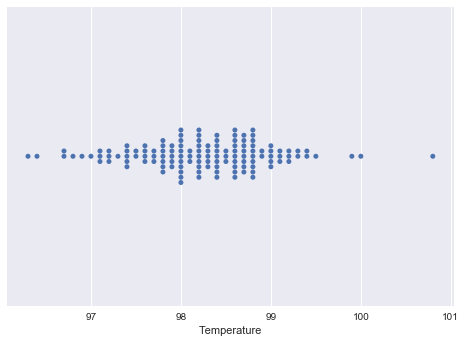

In [26]:
_ = sns.swarmplot(x= temperature, data=df)
_= plt.xlabel('Temperature')
plt.show()

* Observations show a good density between 98 and 99 degrees
* There are some observable outliers which should be noted

* The margin of error being low tells us that our 

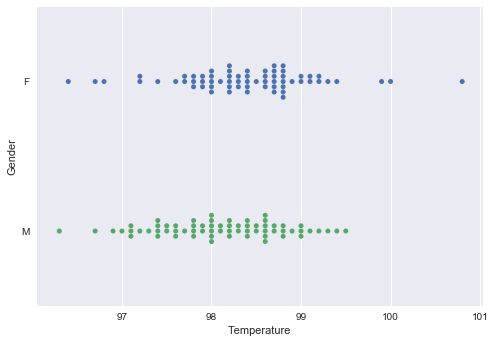

In [9]:
_ = sns.swarmplot(x= temperature, y='gender', data=df)
_= plt.xlabel('Temperature')
_= plt.ylabel('Gender')
plt.show()

* Investigaitng the outliers we can see that there is a difference between gender
* Observing the temperature by gender we can see that males have a slightly lower temperature than the females in the sample 
* The very high temperature observations seem to be from the females and the low outliers are generated by both male and females observations 

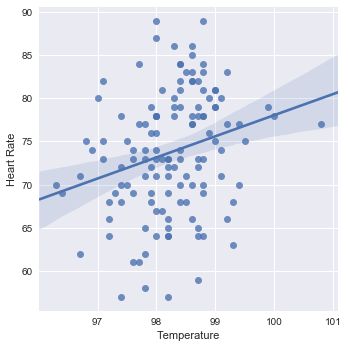

In [10]:
# Linear regression observation against heart rate

_= sns.lmplot(x= 'temperature', y='heart_rate', data=df)
_= plt.xlabel('Temperature')
_= plt.ylabel('Heart Rate')
plt.show()

*  The correlation of temperature to heart rate shows us that there is no uniformity of heart rate and temperature
*  Using the generated correlation line to assign an observation we can see that as heart rate increases temperature rises
*  We can also observe that the heart rate is not an ideal indicator of temperature

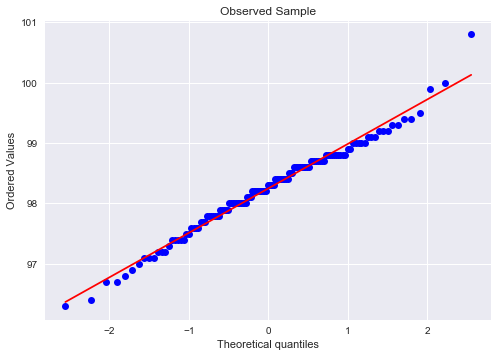

In [11]:
# Quantile plot
_= stats.probplot(temperature, dist="norm", plot=pl)
_= plt.title('Observed Sample')
plt.show()

* From quantile plot we can see that both sample population and observed populaitons display the strong uniform distribution as they both primarily correlate with normal distribution line
* Few outliers are observed beyond 100 but otherwise there is a nice uniform distribution which makes sense given that the temperatures of the samples are within a specific range overall

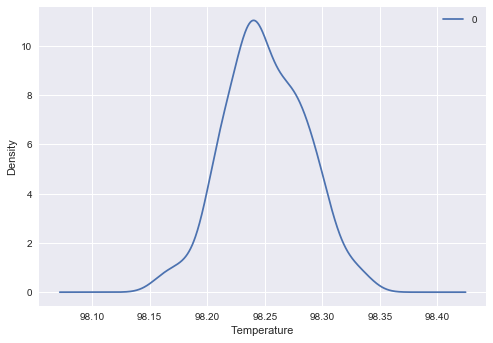

In [12]:
np.random.seed(42)

point_estimates = []         

for x in range(200):         
    sample = np.random.choice(a= temperature, size=500)
    point_estimates.append(sample.mean())
    
_= pd.DataFrame(point_estimates).plot(kind="density") 
_= plt.xlabel('Temperature')
plt.show()

In [13]:
n_data= len(temperature)
n_bins= np.sqrt(n_data)
n_bins= int(n_bins)

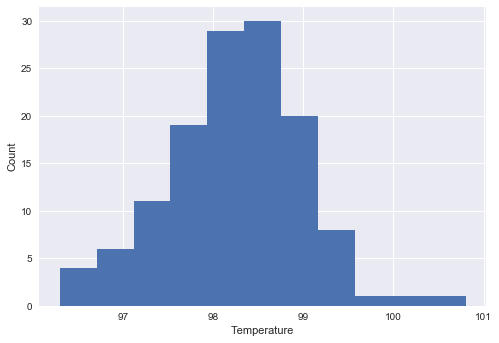

In [14]:
_= plt.hist(temperature, bins= n_bins)
_= plt.xlabel('Temperature')
_= plt.ylabel('Count')
plt.show()

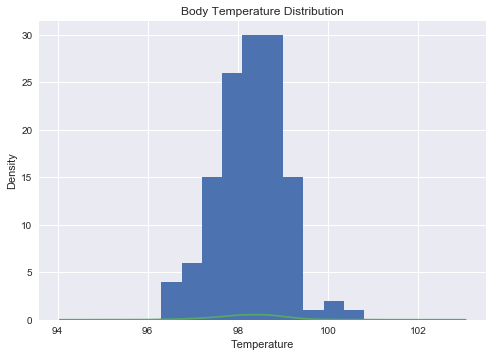

In [15]:
_= temperature.plot(kind='hist', title= 'Body Temperature Distribution')
_= temperature.plot(kind= 'kde')
_= plt.xlabel('Temperature')
plt.show()      

## Is the distribution of body temperatures normal?
* Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    * CLT would apply to this dataset as the mean temperatures of the population will follow a normal distribution as they are within a predictable range of temperatures
    * This sample is indeed representative of the populaiton because the observation are independent
    * We can see that the distribution of the temperatures of the population is quite normal and with very minor curve abiguities
    * We can also see that the curve of the random sample also reflects approximately identical representations
    * We can also observe the ideal normal curve over the kde curve and see that there is little to no difference meaning that the popultation reflects a normal distribution

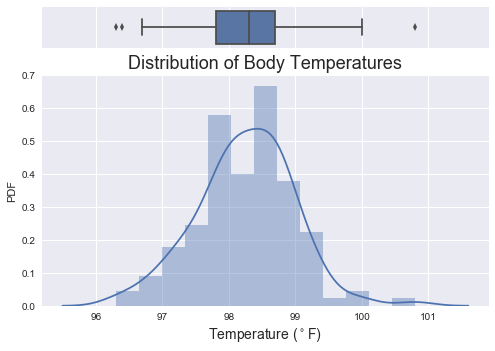

In [27]:
# Create a figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add boxplot for temperature:
sns.boxplot(df.temperature, ax=boxplot)

# Add histogram for temperature:
sns.distplot(df.temperature, ax=histogram)

# Label axes and add title:
plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
plt.ylabel('PDF')
plt.title('Distribution of Body Temperatures', fontsize=18)

# Remove x-axis label for the boxplot:
boxplot.set(xlabel='')

# Display the plots:
plt.show()

In [20]:
# Define a function to compute the CDF:

def cdf(data):
    """Compute CDF for a one-dimensional array of measurements."""

    # Number of data points:
    n = len(data)

    # x-data for the CDF:
    x = np.sort(data)

    # y-data for the CDF:
    y = np.arange(1, n+1) / n

    return x, y

In [21]:
# Compute and save variables for summarizing the empirical distribution -

# Sample Size:
n = len(df.temperature)

# Sample Mean:
M = np.mean(df.temperature)

# Sample Standard Deviation:
s = np.std(df.temperature)

print('n =', n, '\nM =', M, '\ns =', s)

n = 130 
M = 98.24923076923078 
s = 0.7303577789050377


In [22]:
# Seed the random number generator:
np.random.seed(15)


# Simulate a random sample with the same statistics and size of 10,000:
normal = np.random.normal(M, s, 10000)
normal

array([ 98.02111923,  98.49702999,  98.13536176, ...,  98.79844721,
        97.6501198 ,  98.22401087])

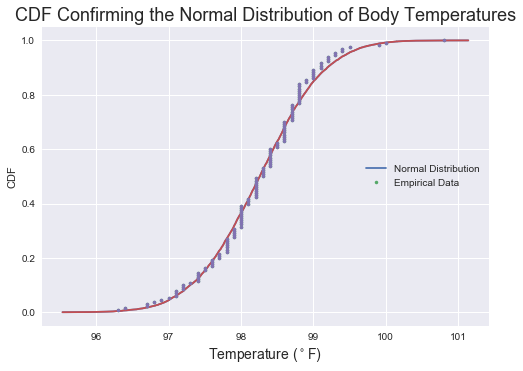

In [24]:
# Compute CDFs:
x_temp, y_temp = cdf(df.temperature)
x_norm, y_norm = cdf(normal)

# Plot both CDFs on the same plot:
fig = plt.plot(x_norm, y_norm)
fig = plt.plot(x_temp, y_temp, marker='.', linestyle='none')

# Label axes and add legend and a title:
fig = plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
fig = plt.ylabel('CDF')
fig = plt.legend(('Normal Distribution', 'Empirical Data'), loc='center right')
fig = plt.title('CDF Confirming the Normal Distribution of Body Temperatures', fontsize=18)


# display the plots:
plt.show()

## Is the sample size large? Are the observations independent?
* From the observations above we can see that the observations are independent and thusly large enough to satisfy our analysis and hypothesis formulations and judgements
* Both the random sample and original sample show similar distributions that are very close to the normal ideal and thusly satisfy the CLT requirement

## Is there a significant difference between males and females in normal temperature?
* What test did you use and why?
    * Comparison of means between temperatures by gender shows that females have a slightly higher average temperature as well as heart rate (which would also help to support wy their temperature is higher) 
* Write a story with your conclusion in the context of the original problem
    * In 1868 Carl Wunderlich established the mean body temperature as 98.6 degrees F which may have been true at the time as more people were inclined in physical labor thus maintaining a higher heart rate to induce a slightly higher mean. There may be other factors that impact the observed mean that we can not determine from this data such as sample size, gender sample size, women who may have been pregnant, people who may have had ailments or weaknesses and other such discrepancies that may impact the mean. Also since not all bodies are quite the same the mean should have been recorded as a range and separated by gender for accuracy. Per each gender a range of normal temperatures should be recorded as normal body temperature.

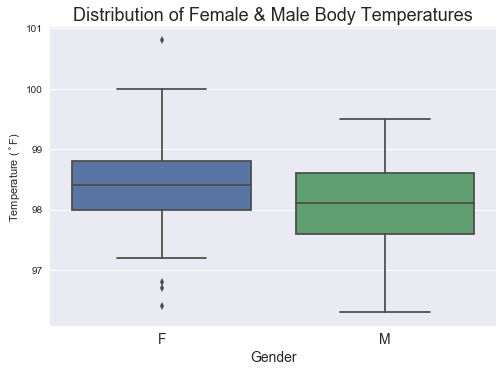

In [40]:
# Create boxplots for temperature by gender:
fig = sns.boxplot(x='gender', y='temperature', data=df)

# Increase tick mark font size, label axes and add title:
plt.tick_params(axis='x', which='major', labelsize=14)
fig = plt.xlabel('Gender', fontsize=14)
fig = plt.ylabel('Temperature ($^\circ$F)')
plt.title('Distribution of Female & Male Body Temperatures', fontsize=18)

# Display the plots:
plt.show()

In [41]:
# Save temperatures filtered by gender:
female_temp = df.temperature[df.gender == 'F']
male_temp = df.temperature[df.gender == 'M']

# Sample Sizes:
n_female = len(female_temp)
n_male = len(male_temp)

# Sample Means:
M_female = np.mean(female_temp)
M_male = np.mean(male_temp)

print('Female Sample Size:', n_female, '\nFemale Temperature Mean:', M_female)
print('\nMale Sample Size:', n_male, '\nMale Temperature Mean:', M_male)


Female Sample Size: 65 
Female Temperature Mean: 98.39384615384613

Male Sample Size: 65 
Male Temperature Mean: 98.1046153846154


In [43]:
# Define permutation functions:

def permutation_sample(data1, data2):
    """Return a permutation sample from two data sets."""

    # Concatenate the data sets:
    data = np.concatenate((data1, data2))

    # Permute the concatenated array:
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two samples:
    permutation_sample_1 = permuted_data[:len(data1)]
    permutation_sample_2 = permuted_data[len(data1):]

    return permutation_sample_1, permutation_sample_2


def draw_permutation_replicates(data_1, data_2, func, size=1):
    """Draw multiple permutation replicates."""

    # Initialize array of permutation replicates:
    permutation_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation samples:
        permutation_sample_1, permutation_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic:
        permutation_replicates[i] = func(permutation_sample_1, permutation_sample_2)

    return permutation_replicates


def difference_of_means(data_1, data_2):
    """Return the difference in means of two arrays."""

    # The difference of means of data_1, data_2:
    return np.mean(data_1) - np.mean(data_2)

In [44]:
# Seed the random number generator:
np.random.seed(15)


# Compute difference of means:
empirical_difference = difference_of_means(female_temp, male_temp)

# Draw 10,000 permutation replicates:
permutation_replicates = draw_permutation_replicates(female_temp, male_temp, difference_of_means, size=10000)

# Compute fraction of replicates that are greater than the observed difference of means:
p = np.sum(permutation_replicates >= empirical_difference) / len(permutation_replicates)

# Print the results:
print('Difference of Means', empirical_difference)
print('p-value =', p)

Difference of Means 0.289230769230727
p-value = 0.013


With p-value of 0.013 the null hypothesis can be rejected but the significance is small. 

In [45]:
# Save results of a two sample t-test:
t = stats.ttest_ind(female_temp, male_temp)[0]
p = stats.ttest_ind(female_temp, male_temp)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: 2.28543453817
p-value: 0.0239318831224


In [46]:
# Print the quantiles of the t-distribution corresponding to
# confidence level and degrees of freedom:
print((stats.t.ppf(q=0.025, df=65-1)), (stats.t.ppf(q=0.975, df=65-1)))

-1.99772965363 1.99772965363


A two-sample t-test returned a t-statistic of 2.29 and p-value of 0.024, so here too, the null hypothesis is rejected. The difference in human body temperatures between females and males, though significant, is not extreme. Women tend to have a slightly higher body temperature.

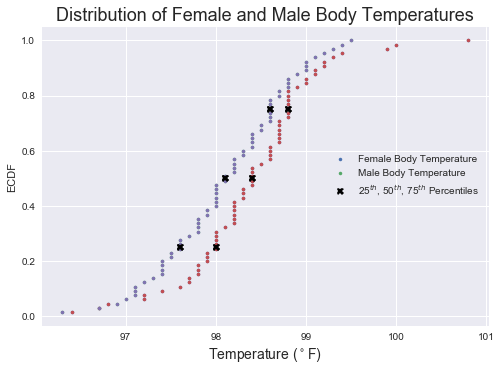

In [48]:
# Compute percentiles:
percentile = np.array([25,50,75])
f_percentiles = np.percentile(df.temperature[df.gender == 'F'], percentile)
m_percentiles = np.percentile(df.temperature[df.gender == 'M'], percentile)

# Compute ECDFs:
fx_temp, fy_temp = cdf(df.temperature[df.gender == 'F'])
mx_temp, my_temp = cdf(df.temperature[df.gender == 'M'])

# Plot both ECDFs on the same plot:
fig = plt.plot(fx_temp, fy_temp, marker='.', linestyle='none')
fig = plt.plot(mx_temp, my_temp, marker='.', linestyle='none')

# Overlay percentiles on each plot:
fig = plt.plot(f_percentiles, percentile/100, marker='X', linestyle='none', color='black')
fig = plt.plot(m_percentiles, percentile/100, marker='X', linestyle='none', color='black')

# Label axes and add legend and a title:
fig = plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
fig = plt.ylabel('ECDF')
fig = plt.legend(('Female Body Temperature', 'Male Body Temperature', '25$^{th}$, 50$^{th}$, 75$^{th}$ Percentiles'), loc='center right')
fig = plt.title('Distribution of Female and Male Body Temperatures', fontsize=18)

# display the plots:
plt.show()

## Is the true population mean really 98.6 degrees F?
* Would you use a one-sample or two-sample test? Why?
    * Per the observations the mean is slightly less than 98.6 but also indicative of a range 
    * Two sample can be used since both female and male are independent groups 
* In this situation, is it appropriate to use the  t  or  z  statistic?
    * Given the population size > 30 both can be used but ideal choice would be z-score
    * Population size is large enough both tests are valid 
* Now try using the other test. How is the result be different? Why?
   * Sample size being large enough makes outcome of z-score and t-score similar

In [32]:
# Save results of a one sample t-test:
t = stats.ttest_1samp(df.temperature, 98.6)[0]
p = stats.ttest_1samp(df.temperature, 98.6)[1]

print('t-statistic:', t)
print('p-value:', p)

array([ 98.4,  97.9,  97.1,  98.7,  98.2,  98.4,  98.2,  98.8,  96.7,  96.4])

In [49]:
# Print the quantiles of the t-distribution corresponding to
# confidence level and degrees of freedom:
print((stats.t.ppf(q=0.0005, df=n-1)), (stats.t.ppf(q=0.9995, df=n-1)))

-3.36754645418 3.36754645418


The t-statistic falls outside the t-distribution corresponding to a 99.9% confidence level and the p-value is certainly below the significance level of 0.01, so the null hypothesis can be rejected.

In [50]:
# Calculate standard error of the mean:
sem = s/np.sqrt(n)

In [51]:
# Calculate and save z-statistic:
z = (M - 98.6) / sem

# Calculate and save p-value:
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic:', z)
print('p-value:', p)

z-statistic: -5.47592520208
p-value: 4.35231516588e-08


The z-statistic is very close to the t-statistic and the p-value is also very low.

In [52]:
# Define bootstrap functions:

def replicate(data, function):
    """Return replicate of a resampled data array."""
    
    # Create the resampled array and return the statistic of interest:
    return function(np.random.choice(data, size=len(data)))


def draw_replicates(data, function, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates:
    replicates = np.empty(size)

    # Generate replicates:
    for i in range(size):
        replicates[i] = replicate(data, function)

    return replicates

In [53]:
# Seed the random number generator:
np.random.seed(15)


# Make an array of translated temperatures:
translated_temps = df.temperature - M + 98.6

# Draw bootstrap replicates of translated temperatures:
translated_replicates = draw_replicates(translated_temps, np.mean, 10000)

# Compute fraction of replicates that are less than the observed temperature mean:
p = np.sum(translated_replicates <= M) / len(translated_replicates)

# Print the p-value:
print('p-value =', p)

p-value = 0.0


* Negative T-statistic result indicates that the t-score is -0.85 deviations less than the normal distribution curve, which we observed earlier given that our ideal mean was hypothesized at 98.6 degrees F but we observed 98.25 per the sample population
* The p-value being less than one indicates that the null hypothesis can be rejected 

In every test the p-value is significantly less than 0.01, so the null hypothesis is rejected. There is sufficient evidence to warrant rejection of the claim that the true population mean is the conventional normal human body temperature of 98.6°F.

## At what temperature should we consider someone's temperature to be "abnormal"?
* Start by computing the margin of error and confidence interval.
    * An abnormal temperature would register outside of the confidence interval since it would be outside of the 95% observations temperatures

In [54]:
from scipy.stats import norm

# Save the critical value at 99.95% confidence:
z_critical = norm.ppf(0.9995)
z_critical

3.2905267314919255

In [55]:
print('Standard Error of the Mean:', sem)

# Calculate and save the margin of error:
moe = z_critical * sem
print('Margin of Error:', moe)

Standard Error of the Mean: 0.0640566146952
Margin of Error: 0.210780002983


In [56]:
# Calculate and save the 99.9% confidence interval:
CI = np.array([M - moe, M + moe])
print('99.9% Confidence Interval:', CI)

99.9% Confidence Interval: [ 98.03845077  98.46001077]


In [57]:
# Seed the random number generator:
np.random.seed(15)


# Draw bootstrap replicates of temperatures:
replicates = draw_replicates(df.temperature, np.mean, 10000)

# Compute the 99.9% confidence interval:
CI = np.percentile(replicates, [0.05, 99.95])
print('99.9% Confidence Interval:', CI)

99.9% Confidence Interval: [ 98.04384577  98.45923154]


Even at a 99.9% confidence interval, the range of temperatures is only 98.0 - 98.5°F. Statistics in this case seem to fall short of determining the abnormal body temperature.

Though the conventional human body temperature was rejected as the true population mean, values outside the confidence interval should not be rejected as plausible normal body temperatures. 

# Conclusion

## This data allows us to conclude that the sample size was sufficient enough to draw the conclusion that the average (or mean) temperature of the sample size is slightly less than the ideal of 98.6 which allows us to understand that there is an allowable variance for normal temperature. We can also deduce from the swarmplot distributions and densities that females in this sample have a slightly higher temperature than males. The highest observed outlier was observed in females and lowest observed outlier was observed in men.

## The p value also tells us that the random generated sample and the original sample are independent values. In both the random sample and original sample we can observe a very similar distribution curve which allows us to perceive that the sample is sufficient in size to achieve the necessary observations and deductions. 

## Overall we can safely assume that there is a range associated to normal temperatures as everyone is not the same, in the observation we can see the range as approximately from 97.8 to 98.8 in this sample representative of the population. We can also observe that our 95% confidence interval reflects a range from 98.12 to 98.37 for the observed population. 

## We also observed in our calculations that average female heart rates and temperatures were slightly higher than males.

## We are able to reject that the average normal temperature is 98.6 as that may be due to the age of the data being 120 years old with many factors impacting the number such as lifestyle, work, health, etc. We can safely assume that the normal human body temperature is more accurate as a range that can be separated by gender if needed. 